2025-03-21 16:35:19,512 - DataProcessor - INFO - Successfully loaded data from insurance.csv
2025-03-21 16:35:19,512 - DataProcessor - INFO - Successfully loaded data from insurance.csv



📊 Data loaded successfully from insurance.csv

📌 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       10000 non-null  object 
 1   Age                        10000 non-null  int64  
 2   Gender                     10000 non-null  object 
 3   BMI                        10000 non-null  float64
 4   Smoking Status             10000 non-null  object 
 5   Region                     10000 non-null  object 
 6   Diabetes                   10000 non-null  int64  
 7   Hypertension               10000 non-null  int64  
 8   Heart Disease              10000 non-null  int64  
 9   Cancer History             10000 non-null  int64  
 10  Stroke                     10000 non-null  int64  
 11  Liver Disease              10000 non-null  int64  
 12  Kidney Disease             10000

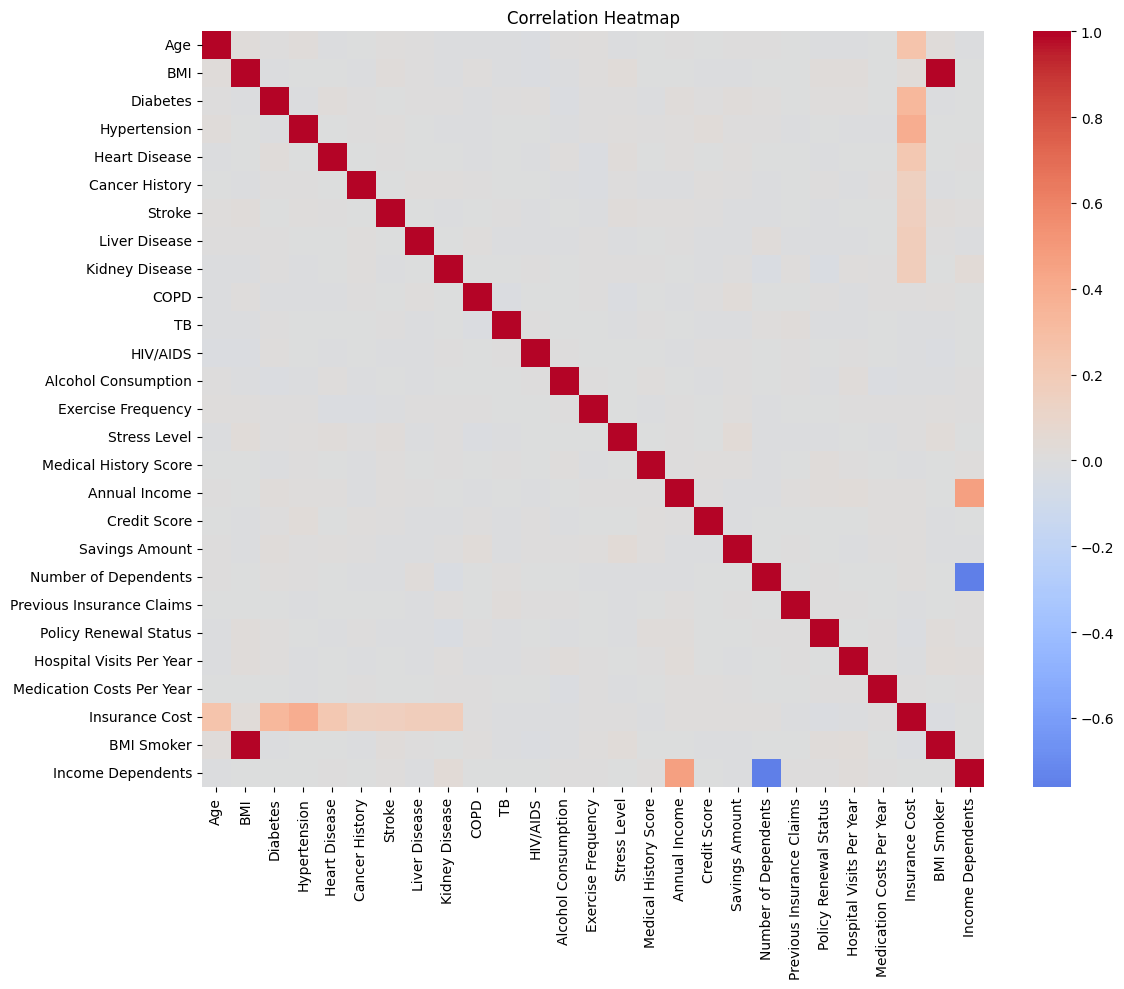


🔗 Top Correlated Features:
BMI Smoker         BMI                  0.995332
BMI                BMI Smoker           0.995332
Annual Income      Income Dependents    0.463809
Income Dependents  Annual Income        0.463809
Hypertension       Insurance Cost       0.387791
Insurance Cost     Hypertension         0.387791
                   Diabetes             0.326958
Diabetes           Insurance Cost       0.326958
Age                Insurance Cost       0.251658
Insurance Cost     Age                  0.251658
dtype: float64


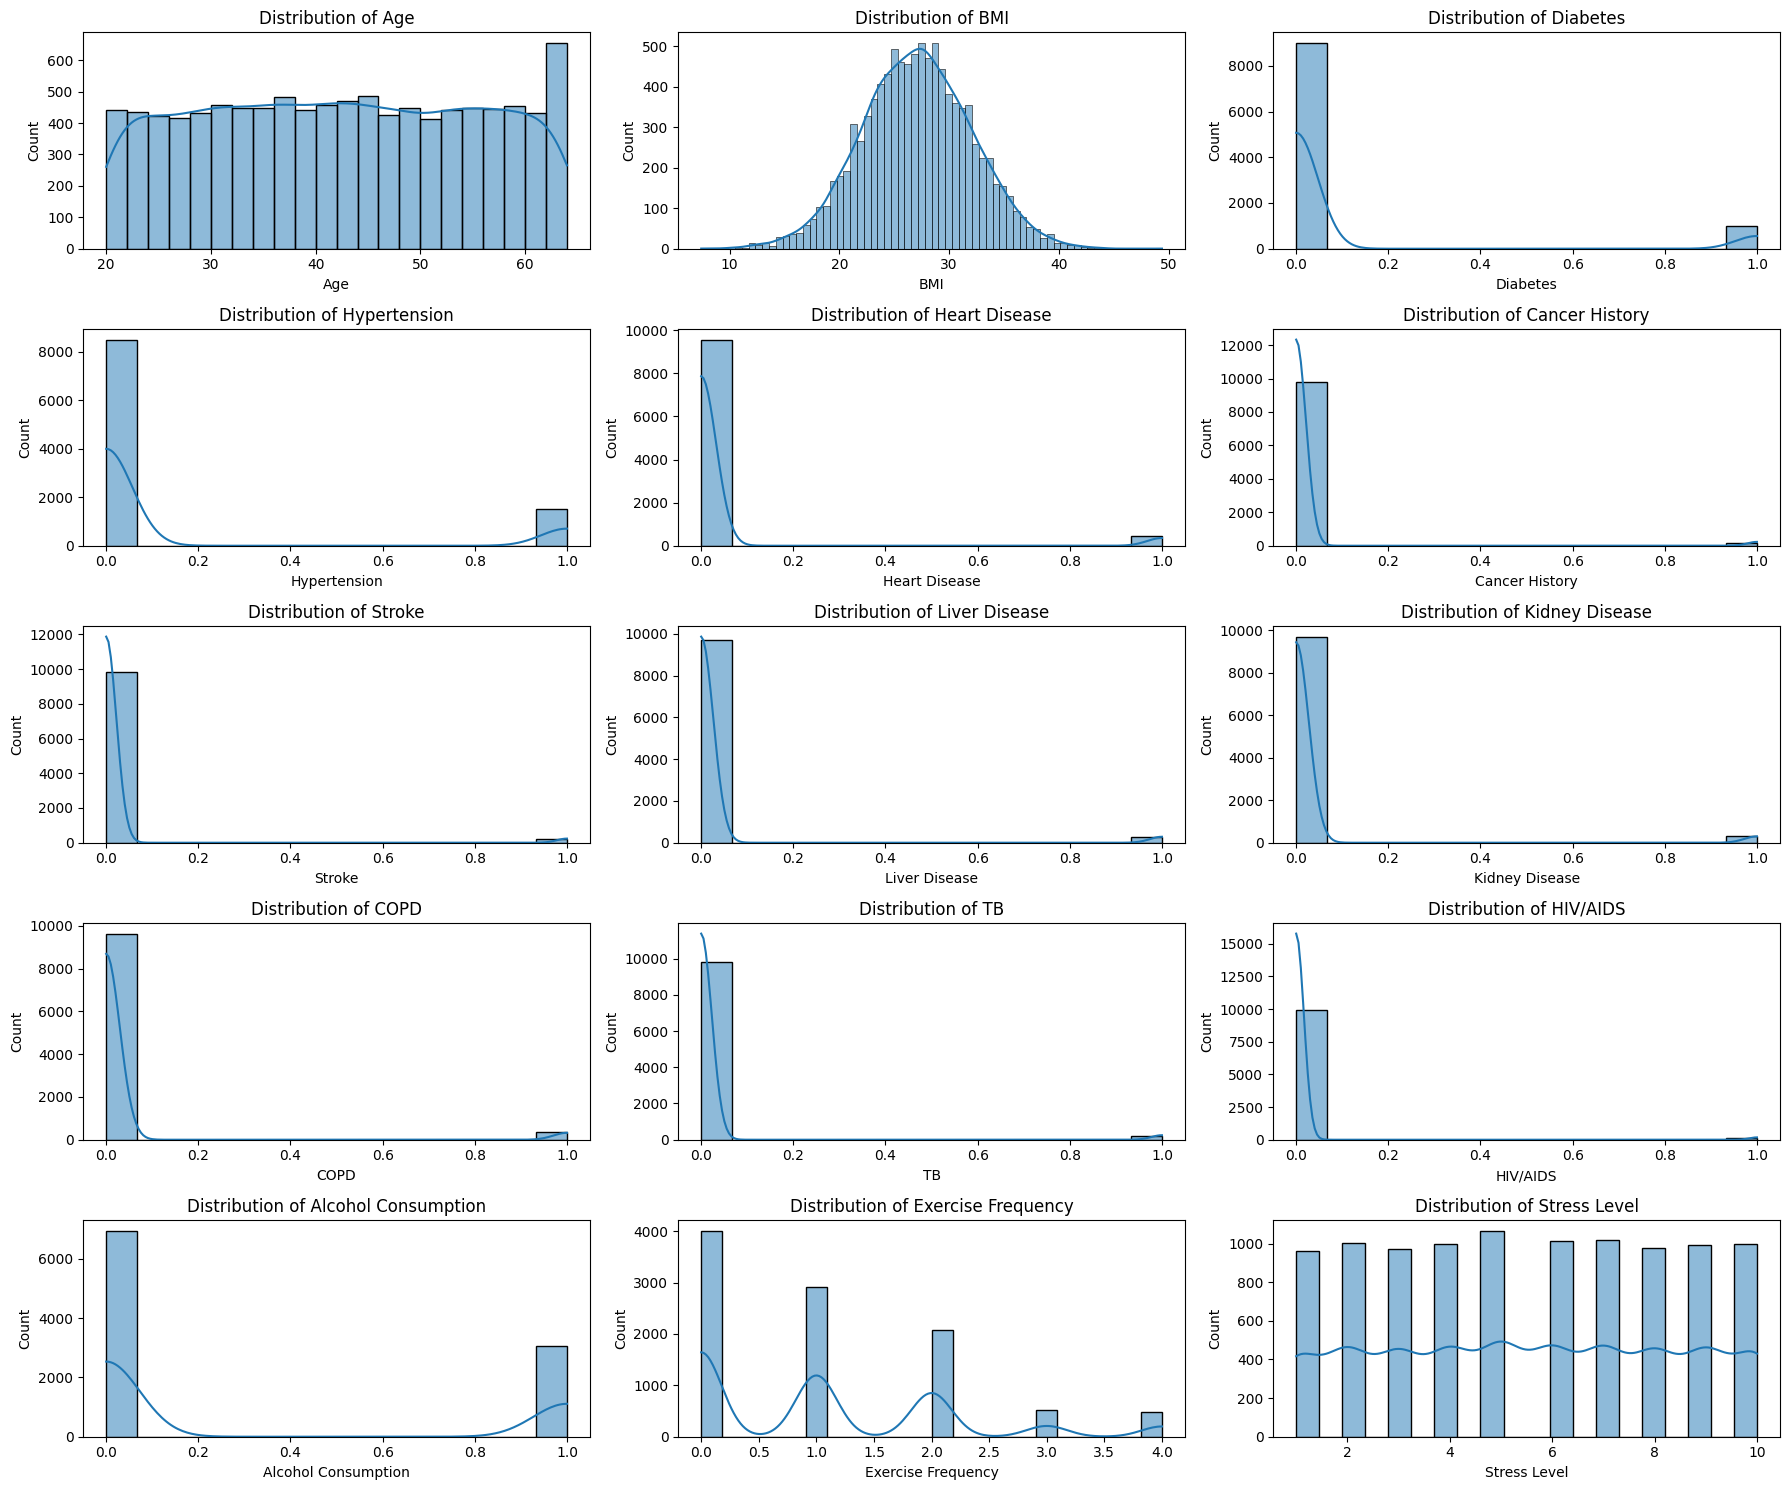

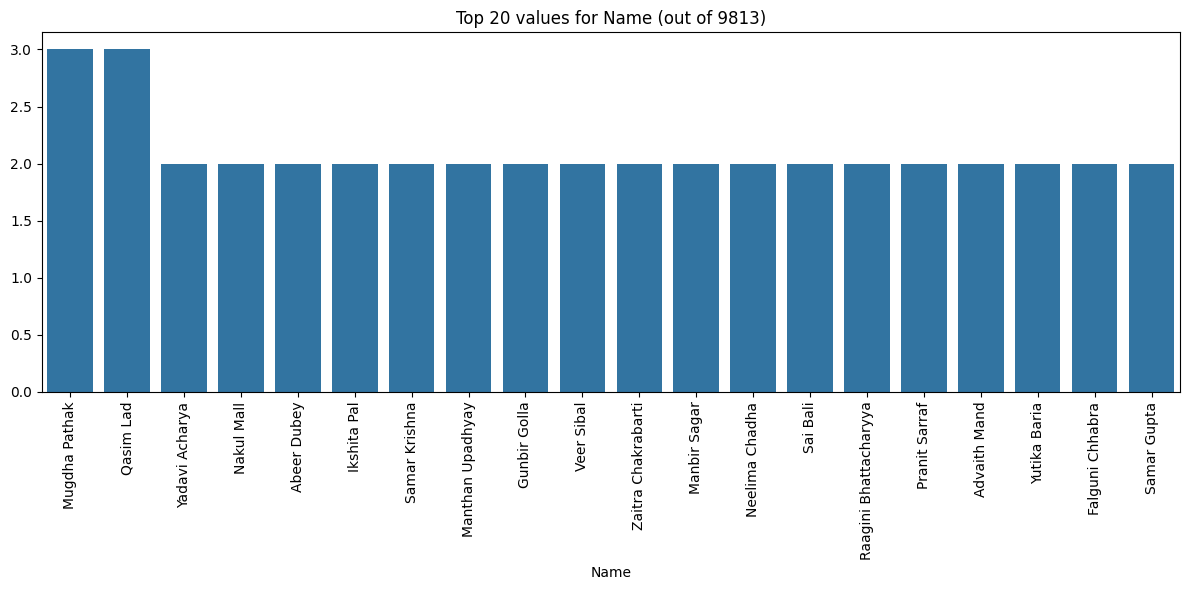

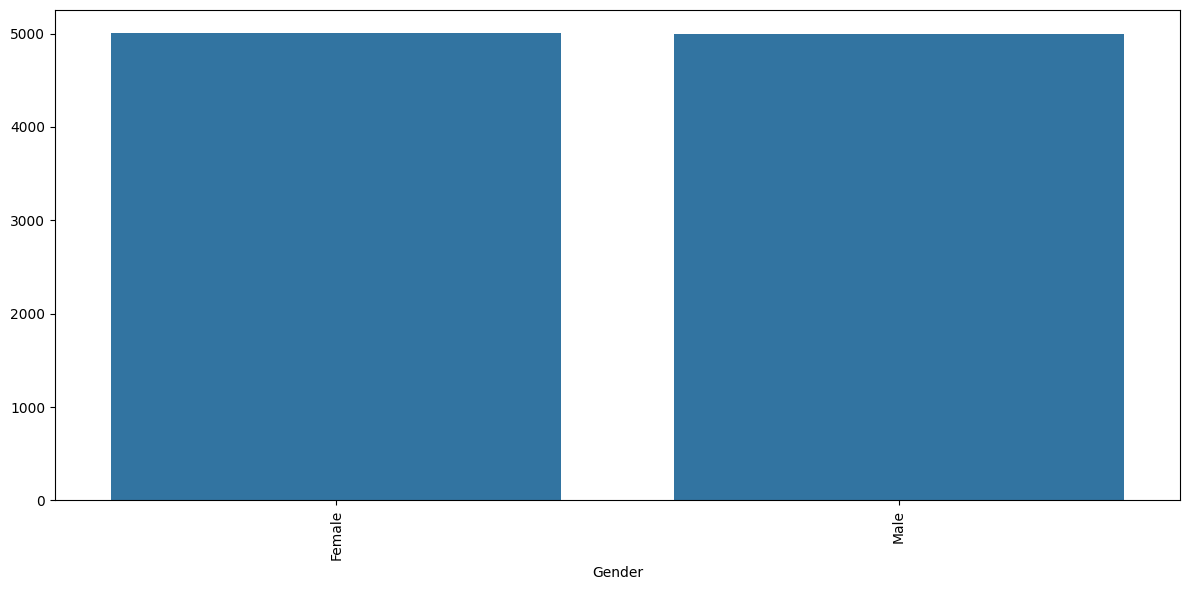

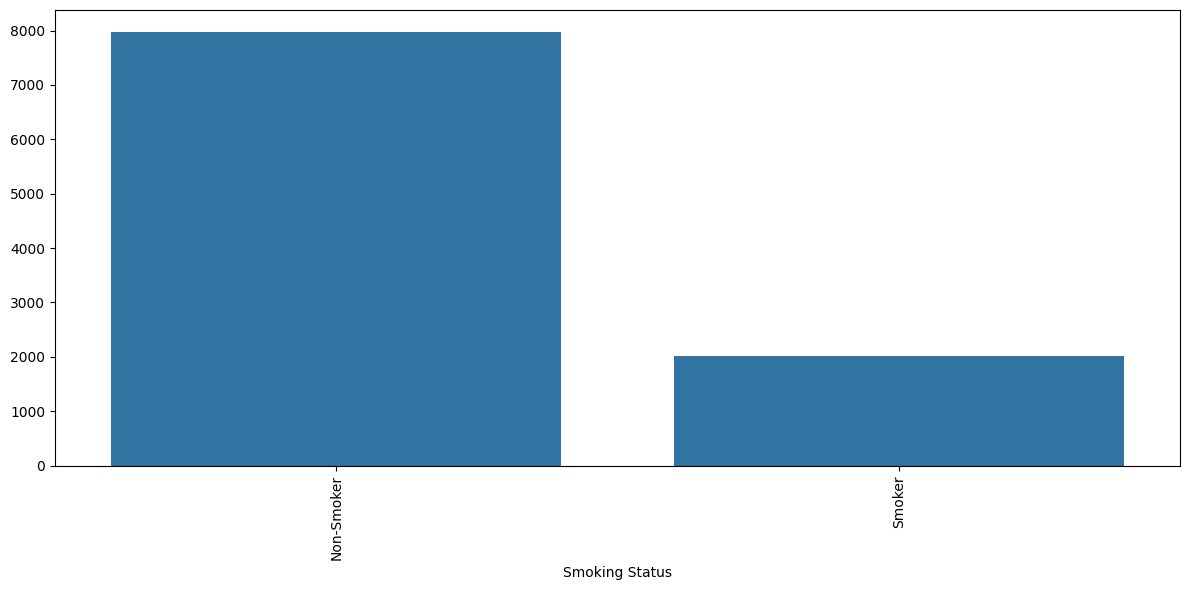

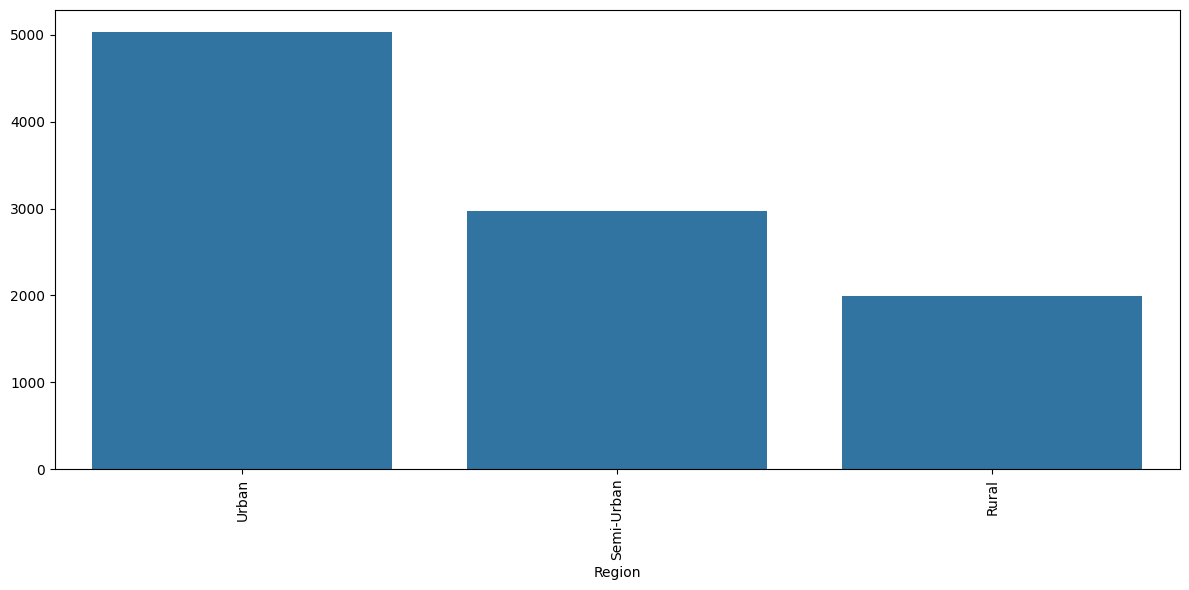

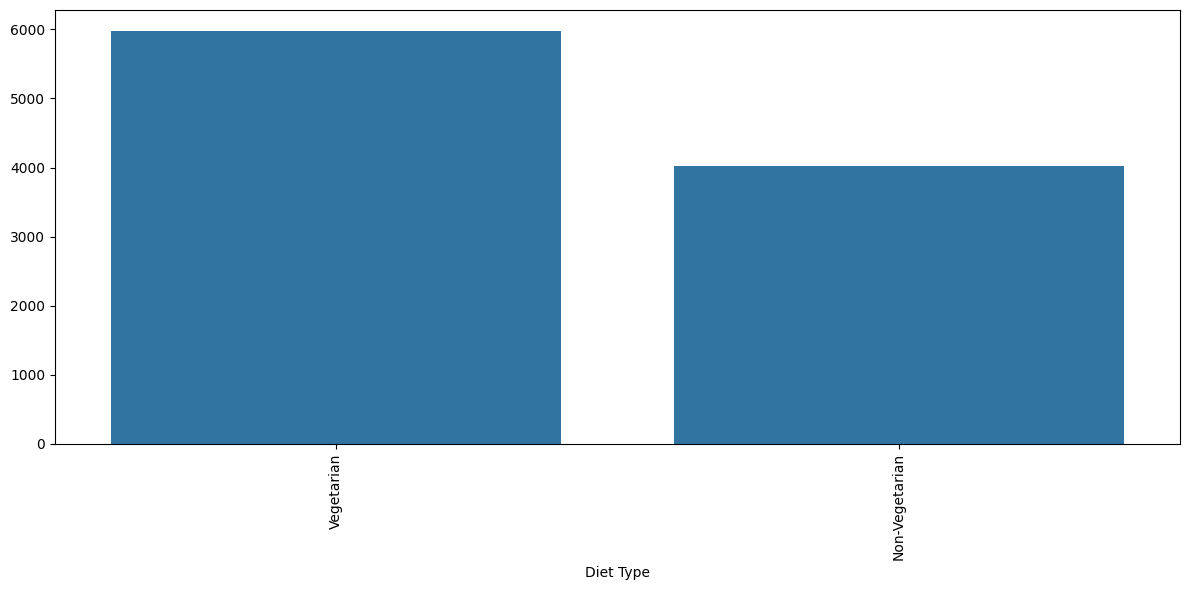

2025-03-21 16:35:23,486 - DataProcessor - INFO - Exploratory data analysis completed
2025-03-21 16:35:23,486 - DataProcessor - INFO - Exploratory data analysis completed
2025-03-21 16:35:23,488 - DataProcessor - INFO - Pipeline step 1: Missing Values - handle_missing_values
2025-03-21 16:35:23,488 - DataProcessor - INFO - Pipeline step 1: Missing Values - handle_missing_values
2025-03-21 16:35:23,494 - DataProcessor - INFO - Pipeline step 2: Encode Categorical - encode_categorical
2025-03-21 16:35:23,494 - DataProcessor - INFO - Pipeline step 2: Encode Categorical - encode_categorical
2025-03-21 16:35:23,525 - DataProcessor - INFO - Categorical variables encoded using label encoding
2025-03-21 16:35:23,525 - DataProcessor - INFO - Categorical variables encoded using label encoding
2025-03-21 16:35:23,527 - DataProcessor - INFO - Pipeline step 3: Handle Outliers - handle_outliers
2025-03-21 16:35:23,527 - DataProcessor - INFO - Pipeline step 3: Handle Outliers - handle_outliers
2025-03-


📈 Skewness of Features:
Age                          0.003011
BMI                         -0.002081
Diabetes                     2.691355
Hypertension                 1.962885
Heart Disease                4.476605
Cancer History               7.209659
Stroke                       6.932158
Liver Disease                5.711908
Kidney Disease               5.441861
COPD                         4.989976
TB                           6.631992
HIV/AIDS                     9.291014
Alcohol Consumption          0.849254
Exercise Frequency           0.949644
Stress Level                -0.002394
Medical History Score        0.001282
Annual Income                0.000469
Credit Score                -0.008488
Savings Amount              -0.004070
Number of Dependents         0.020152
Previous Insurance Claims    2.494978
Policy Renewal Status       -1.895311
Hospital Visits Per Year     1.068979
Medication Costs Per Year    0.007677
Insurance Cost               0.940148
BMI Smoker               

2025-03-21 16:35:24,084 - DataProcessor - INFO - Processed data saved to processed_data/insurance_processed_20250321_163523.csv
2025-03-21 16:35:24,084 - DataProcessor - INFO - Processed data saved to processed_data/insurance_processed_20250321_163523.csv



✅ Processed data saved to processed_data/insurance_processed_20250321_163523.csv


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from scipy import stats
import os
import logging
import warnings
from datetime import datetime

class DataProcessor:
    """
    A class for comprehensive data processing and cleaning operations.
    
    This class handles loading, exploring, cleaning, transforming, and saving data
    with various configuration options and robust error handling.
    """
    
    def __init__(self, file_path, output_dir="processed_data", 
                 log_level=logging.INFO, verbose=True):
        """Initialize the data processor with configuration options."""
        self.file_path = file_path
        self.output_dir = output_dir
        self.verbose = verbose
        self.data = None
        self.data_cleaned = None
        self.categorical_cols = None
        self.numeric_cols = None
        self.label_encoders = {}
        self.scalers = {}
        
        # Setup logging
        self._setup_logging(log_level)
        
        # Create output directory if it doesn't exist
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
            self.logger.info(f"Created output directory: {output_dir}")
    
    def _setup_logging(self, log_level):
        """Set up logging configuration."""
        self.logger = logging.getLogger("DataProcessor")
        self.logger.setLevel(log_level)
        
        # Create handlers
        c_handler = logging.StreamHandler()
        f_handler = logging.FileHandler(f"data_processing_{datetime.now().strftime('%Y%m%d_%H%M%S')}.log")
        c_handler.setLevel(log_level)
        f_handler.setLevel(log_level)
        
        # Create formatters
        formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
        c_handler.setFormatter(formatter)
        f_handler.setFormatter(formatter)
        
        # Add handlers to the logger
        self.logger.addHandler(c_handler)
        self.logger.addHandler(f_handler)
    
    def _print_if_verbose(self, message):
        """Print message if verbose mode is enabled."""
        if self.verbose:
            print(message)
    
    def load_data(self, sep=',', encoding='utf-8', **kwargs):
        """
        Load data from file with error handling.
        
        Parameters:
        -----------
        sep : str, default=','
            Delimiter to use for CSV files
        encoding : str, default='utf-8'
            File encoding
        **kwargs : dict
            Additional parameters to pass to pandas.read_csv
            
        Returns:
        --------
        pandas.DataFrame
            The loaded data
        """
        try:
            file_ext = os.path.splitext(self.file_path)[1].lower()
            
            if file_ext == '.csv':
                self.data = pd.read_csv(self.file_path, sep=sep, encoding=encoding, **kwargs)
            elif file_ext in ['.xlsx', '.xls']:
                self.data = pd.read_excel(self.file_path, **kwargs)
            elif file_ext == '.json':
                self.data = pd.read_json(self.file_path, **kwargs)
            elif file_ext in ['.pkl', '.pickle']:
                self.data = pd.read_pickle(self.file_path, **kwargs)
            else:
                raise ValueError(f"Unsupported file extension: {file_ext}")
                
            self.logger.info(f"Successfully loaded data from {self.file_path}")
            self._print_if_verbose(f"\n📊 Data loaded successfully from {self.file_path}")
            return self.data
            
        except FileNotFoundError:
            self.logger.error(f"File not found: {self.file_path}")
            raise
        except Exception as e:
            self.logger.error(f"Error loading file: {str(e)}")
            raise
    
    def explore_data(self, show_plots=True):
        """
        Perform exploratory data analysis on the dataset.
        
        Parameters:
        -----------
        show_plots : bool, default=True
            Whether to display the plots
            
        Returns:
        --------
        dict
            A dictionary containing EDA results
        """
        if self.data is None:
            self.logger.warning("No data loaded. Call load_data() first.")
            return None
            
        results = {}
        
        # Basic information
        self._print_if_verbose("\n📌 Dataset Information:")
        self._print_if_verbose(self.data.info())
        results['info'] = self.data.info()
        
        # Summary statistics
        self._print_if_verbose("\n📊 Summary Statistics:")
        self._print_if_verbose(self.data.describe())
        results['summary'] = self.data.describe()
        
        # Missing values
        missing_values = self.data.isnull().sum()
        if (missing_values > 0).any():
            self._print_if_verbose("\n⚠️ Missing Values Found:")
            self._print_if_verbose(missing_values[missing_values > 0])
        else:
            self._print_if_verbose("\n✅ No Missing Values Found.")
        results['missing_values'] = missing_values
        
        # Identify data types
        self.categorical_cols = self.data.select_dtypes(include=['object', 'category']).columns
        self.numeric_cols = self.data.select_dtypes(include=['number']).columns
        results['categorical_cols'] = self.categorical_cols
        results['numeric_cols'] = self.numeric_cols
        
        # Correlation analysis
        if len(self.numeric_cols) > 0:
            correlation = self.data[self.numeric_cols].corr()
            results['correlation'] = correlation
            
            # Plot correlation heatmap
            if show_plots:
                plt.figure(figsize=(12, 10))
                sns.heatmap(correlation, annot=False, cmap='coolwarm', center=0)
                plt.title('Correlation Heatmap')
                plt.tight_layout()
                plt.show()
                
            # Top correlations
            top_corr = correlation.unstack().sort_values(ascending=False)
            top_corr = top_corr[top_corr < 1].head(10)  # Exclude self-correlation
            self._print_if_verbose("\n🔗 Top Correlated Features:")
            self._print_if_verbose(top_corr)
            results['top_correlations'] = top_corr
            
        # Distribution of numerical features
        if show_plots and len(self.numeric_cols) > 0:
            fig, axes = plt.subplots(nrows=min(len(self.numeric_cols), 5), ncols=3, 
                                     figsize=(18, 3*min(len(self.numeric_cols), 5)))
            axes = axes.flatten()
            
            for i, col in enumerate(self.numeric_cols[:min(len(self.numeric_cols), 15)]):
                sns.histplot(self.data[col], ax=axes[i], kde=True)
                axes[i].set_title(f'Distribution of {col}')
                
            plt.tight_layout()
            plt.show()
            
        # Distribution of categorical features
        if show_plots and len(self.categorical_cols) > 0:
            for col in self.categorical_cols[:min(len(self.categorical_cols), 5)]:
                plt.figure(figsize=(12, 6))
                value_counts = self.data[col].value_counts().sort_values(ascending=False)
                if len(value_counts) > 20:  # Too many categories
                    value_counts = value_counts.head(20)
                    plt.title(f'Top 20 values for {col} (out of {len(self.data[col].unique())})')
                sns.barplot(x=value_counts.index, y=value_counts.values)
                plt.xticks(rotation=90)
                plt.tight_layout()
                plt.show()
                
        # Check for skewness
        if len(self.numeric_cols) > 0:
            skewness = self.data[self.numeric_cols].skew()
            self._print_if_verbose("\n📈 Skewness of Features:")
            self._print_if_verbose(skewness)
            results['skewness'] = skewness
            
            # Identify highly skewed features (absolute skewness > 1)
            highly_skewed = skewness[abs(skewness) > 1].sort_values(ascending=False)
            if len(highly_skewed) > 0:
                self._print_if_verbose("\n⚠️ Highly Skewed Features (|skewness| > 1):")
                self._print_if_verbose(highly_skewed)
                results['highly_skewed'] = highly_skewed
        
        self.logger.info("Exploratory data analysis completed")
        return results
    
    def handle_missing_values(self, strategy='auto', custom_values=None):
        """
        Handle missing values in the dataset.
        
        Parameters:
        -----------
        strategy : str or dict, default='auto'
            Strategy for imputing missing values:
            - 'auto': Numeric columns use median, categorical use mode
            - 'mean': Use mean for numeric columns
            - 'median': Use median for numeric columns
            - 'mode': Use mode for all columns
            - 'constant': Use constant value specified in custom_values
            - dict: A dictionary mapping column names to strategies
            
        custom_values : dict, default=None
            Dictionary mapping column names to constant values for imputation
            when strategy='constant' or for specific columns
            
        Returns:
        --------
        pandas.DataFrame
            The dataframe with missing values handled
        """
        if self.data is None:
            self.logger.warning("No data loaded. Call load_data() first.")
            return None
            
        # Create a copy to avoid modifying original
        self.data_cleaned = self.data.copy()
        
        # Check if there are any missing values
        missing_values = self.data_cleaned.isnull().sum()
        if not (missing_values > 0).any():
            self._print_if_verbose("\n✅ No missing values to handle.")
            return self.data_cleaned
            
        # Identify column types if not already done
        if self.categorical_cols is None or self.numeric_cols is None:
            self.categorical_cols = self.data_cleaned.select_dtypes(include=['object', 'category']).columns
            self.numeric_cols = self.data_cleaned.select_dtypes(include=['number']).columns
        
        # Handle different strategies
        if strategy == 'auto':
            # Numeric: median, Categorical: mode
            for col in self.data_cleaned.columns:
                if col in self.numeric_cols:
                    self.data_cleaned[col] = self.data_cleaned[col].fillna(
                        self.data_cleaned[col].median())
                else:
                    self.data_cleaned[col] = self.data_cleaned[col].fillna(
                        self.data_cleaned[col].mode()[0])
                        
        elif strategy in ['mean', 'median', 'mode']:
            # Apply the same strategy to all columns
            for col in self.data_cleaned.columns:
                if col in self.numeric_cols:
                    if strategy == 'mean':
                        self.data_cleaned[col] = self.data_cleaned[col].fillna(
                            self.data_cleaned[col].mean())
                    elif strategy == 'median':
                        self.data_cleaned[col] = self.data_cleaned[col].fillna(
                            self.data_cleaned[col].median())
                    else:  # mode
                        self.data_cleaned[col] = self.data_cleaned[col].fillna(
                            self.data_cleaned[col].mode()[0])
                else:
                    # For categorical, always use mode
                    self.data_cleaned[col] = self.data_cleaned[col].fillna(
                        self.data_cleaned[col].mode()[0])
                        
        elif strategy == 'constant':
            # Use custom values
            if custom_values is None:
                self.logger.warning("No custom values provided for constant strategy.")
                return self.data_cleaned
                
            for col, value in custom_values.items():
                if col in self.data_cleaned.columns:
                    self.data_cleaned[col] = self.data_cleaned[col].fillna(value)
                    
        elif isinstance(strategy, dict):
            # Apply different strategies to different columns
            for col, col_strategy in strategy.items():
                if col not in self.data_cleaned.columns:
                    continue
                    
                if col_strategy == 'mean' and col in self.numeric_cols:
                    self.data_cleaned[col] = self.data_cleaned[col].fillna(
                        self.data_cleaned[col].mean())
                elif col_strategy == 'median' and col in self.numeric_cols:
                    self.data_cleaned[col] = self.data_cleaned[col].fillna(
                        self.data_cleaned[col].median())
                elif col_strategy == 'mode':
                    self.data_cleaned[col] = self.data_cleaned[col].fillna(
                        self.data_cleaned[col].mode()[0])
                elif col_strategy == 'constant' and custom_values and col in custom_values:
                    self.data_cleaned[col] = self.data_cleaned[col].fillna(custom_values[col])
                    
        # Final check for missing values
        missing_after = self.data_cleaned.isnull().sum()
        if (missing_after > 0).any():
            self.logger.warning("Some missing values remain after imputation.")
            self._print_if_verbose("\n⚠️ Some missing values remain:")
            self._print_if_verbose(missing_after[missing_after > 0])
        else:
            self._print_if_verbose("\n✅ All missing values handled.")
            
        self.logger.info("Missing values handled using strategy: " + str(strategy))
        return self.data_cleaned
    
    def encode_categorical(self, method='label', drop_first=False, handle_unknown='error'):
        """
        Encode categorical variables in the dataset.
        
        Parameters:
        -----------
        method : str, default='label'
            Encoding method:
            - 'label': Use LabelEncoder for each categorical column
            - 'onehot': Use one-hot encoding (pd.get_dummies)
            - 'ordinal': Use LabelEncoder but preserve ordering
            
        drop_first : bool, default=False
            Whether to drop the first category in one-hot encoding
            
        handle_unknown : str, default='error'
            How to handle unknown categories in new data:
            - 'error': Raise an error
            - 'ignore': Ignore unknown categories
            
        Returns:
        --------
        pandas.DataFrame
            The dataframe with encoded categorical variables
        """
        if self.data_cleaned is None:
            if self.data is None:
                self.logger.warning("No data loaded. Call load_data() first.")
                return None
            self.data_cleaned = self.data.copy()
            
        # Identify categorical columns if not already done
        if self.categorical_cols is None:
            self.categorical_cols = self.data_cleaned.select_dtypes(include=['object', 'category']).columns
            
        if len(self.categorical_cols) == 0:
            self._print_if_verbose("\n✅ No categorical variables to encode.")
            return self.data_cleaned
            
        # Apply encoding based on method
        if method == 'label':
            for col in self.categorical_cols:
                le = LabelEncoder()
                self.data_cleaned[col] = le.fit_transform(self.data_cleaned[col])
                self.label_encoders[col] = le
                
        elif method == 'onehot':
            # One-hot encode categorical columns
            self.data_cleaned = pd.get_dummies(
                self.data_cleaned, 
                columns=self.categorical_cols, 
                drop_first=drop_first,
                dtype=int
            )
            
        elif method == 'ordinal':
            # Use label encoding but assume ordering is meaningful
            for col in self.categorical_cols:
                le = LabelEncoder()
                self.data_cleaned[col] = le.fit_transform(self.data_cleaned[col])
                self.label_encoders[col] = le
                
        # Update numeric columns after encoding
        self.numeric_cols = self.data_cleaned.select_dtypes(include=['number']).columns
        
        self._print_if_verbose(f"\n🔠 Categorical variables encoded using {method} encoding.")
        self.logger.info(f"Categorical variables encoded using {method} encoding")
        return self.data_cleaned
    
    def handle_outliers(self, method='zscore', threshold=3.0, columns=None):
        """
        Handle outliers in the dataset.
        
        Parameters:
        -----------
        method : str, default='zscore'
            Method to detect outliers:
            - 'zscore': Use Z-score method
            - 'iqr': Use Interquartile Range method
            - 'percentile': Use percentile method
            
        threshold : float, default=3.0
            Threshold for outlier detection:
            - For 'zscore': Z-score threshold (typically 3)
            - For 'iqr': IQR multiplier (typically 1.5)
            - For 'percentile': Percentile cut (e.g., 0.01 for 1%)
            
        columns : list, default=None
            List of columns to check for outliers.
            If None, uses all numeric columns
            
        Returns:
        --------
        pandas.DataFrame
            The dataframe with outliers handled
        """
        if self.data_cleaned is None:
            if self.data is None:
                self.logger.warning("No data loaded. Call load_data() first.")
                return None
            self.data_cleaned = self.data.copy()
            
        # Use specified columns or all numeric columns
        if columns is None:
            if self.numeric_cols is None:
                self.numeric_cols = self.data_cleaned.select_dtypes(include=['number']).columns
            cols_to_check = self.numeric_cols
        else:
            cols_to_check = [col for col in columns if col in self.data_cleaned.columns]
            
        # Keep track of original size
        original_size = len(self.data_cleaned)
        
        # Apply outlier detection based on method
        if method == 'zscore':
            # Z-score method
            z_scores = np.abs(stats.zscore(self.data_cleaned[cols_to_check], nan_policy='omit'))
            self.data_cleaned = self.data_cleaned[(z_scores < threshold).all(axis=1)].copy()
            
        elif method == 'iqr':
            # IQR method
            mask = np.ones(len(self.data_cleaned), dtype=bool)
            for col in cols_to_check:
                Q1 = self.data_cleaned[col].quantile(0.25)
                Q3 = self.data_cleaned[col].quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - threshold * IQR
                upper_bound = Q3 + threshold * IQR
                col_mask = (self.data_cleaned[col] >= lower_bound) & (self.data_cleaned[col] <= upper_bound)
                mask = mask & col_mask
            self.data_cleaned = self.data_cleaned[mask].copy()
            
        elif method == 'percentile':
            # Percentile method
            mask = np.ones(len(self.data_cleaned), dtype=bool)
            for col in cols_to_check:
                lower_bound = self.data_cleaned[col].quantile(threshold)
                upper_bound = self.data_cleaned[col].quantile(1 - threshold)
                col_mask = (self.data_cleaned[col] >= lower_bound) & (self.data_cleaned[col] <= upper_bound)
                mask = mask & col_mask
            self.data_cleaned = self.data_cleaned[mask].copy()
            
        # Report outliers removed
        outliers_removed = original_size - len(self.data_cleaned)
        self._print_if_verbose(f"\n🧹 Removed {outliers_removed} outliers based on {method} method with threshold {threshold}.")
        self.logger.info(f"Removed {outliers_removed} outliers using {method} method with threshold {threshold}")
        
        return self.data_cleaned
    
    def scale_features(self, method='standard', columns=None):
        """
        Scale numerical features in the dataset.
        
        Parameters:
        -----------
        method : str, default='standard'
            Scaling method:
            - 'standard': StandardScaler (mean=0, std=1)
            - 'minmax': MinMaxScaler (range 0-1)
            - 'robust': RobustScaler (uses median and IQR)
            
        columns : list, default=None
            List of columns to scale.
            If None, scales all numeric columns
            
        Returns:
        --------
        pandas.DataFrame
            The dataframe with scaled features
        """
        if self.data_cleaned is None:
            if self.data is None:
                self.logger.warning("No data loaded. Call load_data() first.")
                return None
            self.data_cleaned = self.data.copy()
            
        # Use specified columns or all numeric columns
        if columns is None:
            if self.numeric_cols is None:
                self.numeric_cols = self.data_cleaned.select_dtypes(include=['number']).columns
            cols_to_scale = self.numeric_cols
        else:
            cols_to_scale = [col for col in columns if col in self.data_cleaned.columns]
            
        # Select the appropriate scaler
        if method == 'standard':
            scaler = StandardScaler()
        elif method == 'minmax':
            scaler = MinMaxScaler()
        elif method == 'robust':
            scaler = RobustScaler()
        else:
            self.logger.error(f"Unknown scaling method: {method}")
            return self.data_cleaned
            
        # Apply scaling
        if len(cols_to_scale) > 0:
            self.data_cleaned[cols_to_scale] = scaler.fit_transform(self.data_cleaned[cols_to_scale])
            self.scalers['method'] = method
            self.scalers['scaler'] = scaler
            self.scalers['columns'] = cols_to_scale
            
            self._print_if_verbose(f"\n📏 Features scaled using {method} scaling.")
            self.logger.info(f"Features scaled using {method} scaling")
        else:
            self._print_if_verbose("\n⚠️ No features to scale.")
            
        return self.data_cleaned
    
    def create_features(self, features_to_create=None):
        """
        Create new features from existing ones.
        
        Parameters:
        -----------
        features_to_create : list of dict, default=None
            List of feature specifications, each containing:
            - 'name': Name for the new feature
            - 'formula': Formula to compute the feature as a string
            - 'description': Optional description of the feature
            
        Returns:
        --------
        pandas.DataFrame
            The dataframe with new features added
        """
        if self.data_cleaned is None:
            if self.data is None:
                self.logger.warning("No data loaded. Call load_data() first.")
                return None
            self.data_cleaned = self.data.copy()
            
        if features_to_create:
            for feature in features_to_create:
                try:
                    name = feature.get('name')
                    formula = feature.get('formula')
                    if name and formula:
                        # Use eval to compute the formula using dataframe columns
                        self.data_cleaned[name] = eval(formula, 
                                                     {'__builtins__': {}}, 
                                                     {'df': self.data_cleaned, 'np': np})
                        
                        desc = feature.get('description', 'No description')
                        self._print_if_verbose(f"✅ Created feature '{name}': {desc}")
                        self.logger.info(f"Created feature '{name}': {desc}")
                except Exception as e:
                    self.logger.error(f"Error creating feature {feature.get('name')}: {str(e)}")
                    self._print_if_verbose(f"❌ Failed to create feature '{feature.get('name')}': {str(e)}")
        
        return self.data_cleaned
    
    def transform_skewed_features(self, threshold=0.5, method='log'):
        """
        Transform skewed numerical features.
        
        Parameters:
        -----------
        threshold : float, default=0.5
            Absolute skewness threshold above which to transform
            
        method : str or dict, default='log'
            Transformation method:
            - 'log': Apply natural log transformation (log(x + 1))
            - 'sqrt': Apply square root transformation
            - 'box-cox': Apply Box-Cox transformation
            - dict: Map column names to specific transformation methods
            
        Returns:
        --------
        pandas.DataFrame
            The dataframe with transformed features
        """
        if self.data_cleaned is None:
            if self.data is None:
                self.logger.warning("No data loaded. Call load_data() first.")
                return None
            self.data_cleaned = self.data.copy()
            
        # Identify numeric columns if not already done
        if self.numeric_cols is None:
            self.numeric_cols = self.data_cleaned.select_dtypes(include=['number']).columns
            
        # Calculate skewness for each numeric column
        skewed_features = {}
        for col in self.numeric_cols:
            skewness = stats.skew(self.data_cleaned[col].dropna())
            if abs(skewness) > threshold:
                skewed_features[col] = skewness
                
        if not skewed_features:
            self._print_if_verbose(f"\n✅ No features found with skewness above {threshold}.")
            return self.data_cleaned
            
        self._print_if_verbose(f"\n🔄 Transforming {len(skewed_features)} skewed features:")
        
        # Apply transformations
        for col, skewness in skewed_features.items():
            # Determine which method to use
            col_method = method[col] if isinstance(method, dict) and col in method else method
            
            # Store original data for comparison
            original_skewness = skewness
            min_val = self.data_cleaned[col].min()
            
            # Apply transformation
            if col_method == 'log':
                # Add offset if needed to make all values positive
                offset = 0 if min_val > 0 else abs(min_val) + 1
                self.data_cleaned[col] = np.log1p(self.data_cleaned[col] + offset)
                transform_name = "log(x + offset)"
            elif col_method == 'sqrt':
                # Add offset if needed to make all values positive
                offset = 0 if min_val > 0 else abs(min_val) + 1
                self.data_cleaned[col] = np.sqrt(self.data_cleaned[col] + offset)
                transform_name = "sqrt(x + offset)"
            elif col_method == 'box-cox':
                # Box-Cox requires positive values
                offset = 0 if min_val > 0 else abs(min_val) + 1
                self.data_cleaned[col], _ = stats.boxcox(self.data_cleaned[col] + offset)
                transform_name = "box-cox"
                
            # Calculate new skewness
            new_skewness = stats.skew(self.data_cleaned[col].dropna())
            self._print_if_verbose(f"  - {col}: {transform_name} reduced skewness from {original_skewness:.3f} to {new_skewness:.3f}")
            self.logger.info(f"Transformed {col} using {transform_name}: skewness from {original_skewness:.3f} to {new_skewness:.3f}")
            
        return self.data_cleaned
    
    def save_processed_data(self, filename=None, format='csv', index=False):
        """
        Save the processed data to a file.
        
        Parameters:
        -----------
        filename : str, default=None
            Name for the output file. If None, uses a default name.
            
        format : str, default='csv'
            File format to save:
            - 'csv': CSV file
            - 'excel': Excel file
            - 'pickle': Pickle file
            
        index : bool, default=False
            Whether to include the index in the output file
            
        Returns:
        --------
        str
            Path to the saved file
        """
        if self.data_cleaned is None:
            self.logger.warning("No processed data to save. Run data processing steps first.")
            return None
            
        # Generate default filename if not provided
        if filename is None:
            base_name = os.path.splitext(os.path.basename(self.file_path))[0]
            timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
            filename = f"{base_name}_processed_{timestamp}"
            
        # Add extension if not included
        if format == 'csv' and not filename.endswith('.csv'):
            filename += '.csv'
        elif format == 'excel' and not (filename.endswith('.xlsx') or filename.endswith('.xls')):
            filename += '.xlsx'
        elif format == 'pickle' and not filename.endswith('.pkl'):
            filename += '.pkl'
            
        # Create full path
        output_path = os.path.join(self.output_dir, filename)
        
        # Save file based on format
        try:
            if format == 'csv':
                self.data_cleaned.to_csv(output_path, index=index)
            elif format == 'excel':
                self.data_cleaned.to_excel(output_path, index=index)
            elif format == 'pickle':
                self.data_cleaned.to_pickle(output_path)
                
            self._print_if_verbose(f"\n✅ Processed data saved to {output_path}")
            self.logger.info(f"Processed data saved to {output_path}")
            return output_path
            
        except Exception as e:
            self.logger.error(f"Error saving processed data: {str(e)}")
            self._print_if_verbose(f"\n❌ Error saving processed data: {str(e)}")
            return None
    
    def process_pipeline(self, steps=None):
        """
        Process data through a customizable pipeline.
        
        Parameters:
        -----------
        steps : list of dict, default=None
            List of processing steps to apply, each containing:
            - 'name': Step name (for logging)
            - 'method': Method name to call
            - 'params': Parameters to pass to the method
            
        Returns:
        --------
        pandas.DataFrame
            The processed dataframe
        """
        if self.data is None:
            self.logger.warning("No data loaded. Call load_data() first.")
            return None
            
        # Default pipeline if none specified
        if steps is None:
            steps = [
                {'name': 'Missing Values', 'method': 'handle_missing_values', 'params': {'strategy': 'auto'}},
                {'name': 'Encode Categorical', 'method': 'encode_categorical', 'params': {'method': 'label'}},
                {'name': 'Handle Outliers', 'method': 'handle_outliers', 'params': {'method': 'zscore', 'threshold': 3.0}},
                {'name': 'Scale Features', 'method': 'scale_features', 'params': {'method': 'standard'}}
            ]
            
        self._print_if_verbose("\n🔄 Starting data processing pipeline...")
        
        # Execute each step in the pipeline
        for i, step in enumerate(steps):
            step_name = step.get('name', f"Step {i+1}")
            method_name = step.get('method')
            params = step.get('params', {})
            
            self._print_if_verbose(f"\n⏩ {step_name}: Applying {method_name}...")
            self.logger.info(f"Pipeline step {i+1}: {step_name} - {method_name}")
            
            try:
                # Get the method from the class by name
                method = getattr(self, method_name, None)
                if method and callable(method):
                    method(**params)
                else:
                    self.logger.warning(f"Method {method_name} not found or not callable.")
            except Exception as e:
                self.logger.error(f"Error in pipeline step '{step_name}': {str(e)}")
                self._print_if_verbose(f"❌ Error in {step_name}: {str(e)}")
                
        self._print_if_verbose("\n✅ Data processing pipeline completed.")
        return self.data_cleaned

# Example usage
if __name__ == "__main__":
    # Initialize processor
    processor = DataProcessor("insurance.csv")
    
    # Load and explore data
    processor.load_data()
    processor.explore_data()
    
    # Process through pipeline
    processor.process_pipeline()
    
    # Save the processed data
    processor.save_processed_data()
